In [10]:
import pandas as pd

# read Porphyry_datasheet
df = pd.read_csv('../data/raw/Dataset/USGS/Porphyry_Copper_Deposit/Porphyry_datasheet.csv'
                 , encoding='ISO-8859-1') # porphyry_dataset unicode is ISO-8859-1

# show the first 5 rows
df.head()

,DEPOSIT,ORIGINAL_DATABASE_SOURCE,COUNTRY,COUNTRY_ABR,LATITUDE,LONGITUDE,LOCATION_REF,CMMI_DEPOSIT_ENVIRONMENT,CMMI_DEPOSIT_GROUP,CMMI_DEPOSIT_TYPE,...,AGE_REFERENCES,TECTONIC_SETTING,TECTONIC_SETTING_REFERENCE,ORE_TONNAGE_MT,CU_PERCENT,MO_PERCENT,AU_GT,AG_GT,G-T_REF,COMMENTS
0,308 Zone,Dicken and others (2016),United States,USA,59.7779,-155.4850,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper,...,Lang and others (2013),continental arc,Dicken and others (2016) and references therein,,,,,,NaN,NaN
1,38 Porphyry,Dicken and others (2016),United States,USA,59.7981,-155.4219,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper-molybdenum,...,Lang and others (2013),continental arc,Dicken and others (2016) and references therein,,,,,,NaN,NaN
2,Ab Talkhun,Dicken and others (2016),Iran,IRN,29.8167,56.1250,Dicken and others (2016) and references therein,Magmatic hydrothermal,Skarn,Skarn copper,...,Dicken and others (2016) and references therein,continental arc,Dicken and others (2016) and references therein,,,,,,NaN,Possible porphyry-related Cu-Fe skarn.
3,Abbas Abad1,Dicken and others (2016),Iran,IRN,38.8833,46.7500,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper,...,Dicken and others (2016) and references therein,postconvergence,Dicken and others (2016) and references therein,,,,,,NaN,NaN
4,Abdar silicat v.,Dicken and others (2016),Iran,IRN,30.3035,55.3094,Dicken and others (2016) and references therein,Magmatic hydrothermal,Porphyry,Porphyry copper,...,Dicken and others (2016) and references therein,continental arc,Dicken and others (2016) and references therein,,,,,,NaN,NaN


In [5]:
# type and non-null count
df.info()

# check null values
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPOSIT                     2394 non-null   object 
 1   ORIGINAL_DATABASE_SOURCE    2394 non-null   object 
 2   COUNTRY                     2394 non-null   object 
 3   COUNTRY_ABR                 2394 non-null   object 
 4   LATITUDE                    2394 non-null   float64
 5   LONGITUDE                   2394 non-null   float64
 6   LOCATION_REF                2394 non-null   object 
 7   CMMI_DEPOSIT_ENVIRONMENT    2394 non-null   object 
 8   CMMI_DEPOSIT_GROUP          2394 non-null   object 
 9   CMMI_DEPOSIT_TYPE           2394 non-null   object 
 10  REPORTED_DEPOSIT_SUBTYPE    2394 non-null   object 
 11  PUBLISHED_AGE               2394 non-null   object 
 12  AGE_TYPE                    2096 non-null   object 
 13  AGE_BASIS                   2096 

NUMERIC_AGE_UNCERTAINTY_MA    1842
STRAT_AGE_MAX_MA              1739
STRAT_AGE_MIN_MA              1739
STRAT_AGE_MEDIAN_MA           1739
COMMENTS                      1674
G-T_REF                       1509
DATE_MINERAL                  1285
AGE_TYPE                       298
AGE_BASIS                      298
METHOD                         298
AGE_REFERENCES                 298
TECTONIC_SETTING_REFERENCE     131
STRATIGRAPHIC_AGE               65
MO_PERCENT                       2
AG_GT                            1
CU_PERCENT                       0
ORE_TONNAGE_MT                   0
TECTONIC_SETTING                 0
AU_GT                            0
ASSIGNED_AGE_MA                  0
DEPOSIT                          0
ORIGINAL_DATABASE_SOURCE         0
PUBLISHED_AGE                    0
REPORTED_DEPOSIT_SUBTYPE         0
CMMI_DEPOSIT_TYPE                0
CMMI_DEPOSIT_GROUP               0
CMMI_DEPOSIT_ENVIRONMENT         0
LOCATION_REF                     0
LONGITUDE           

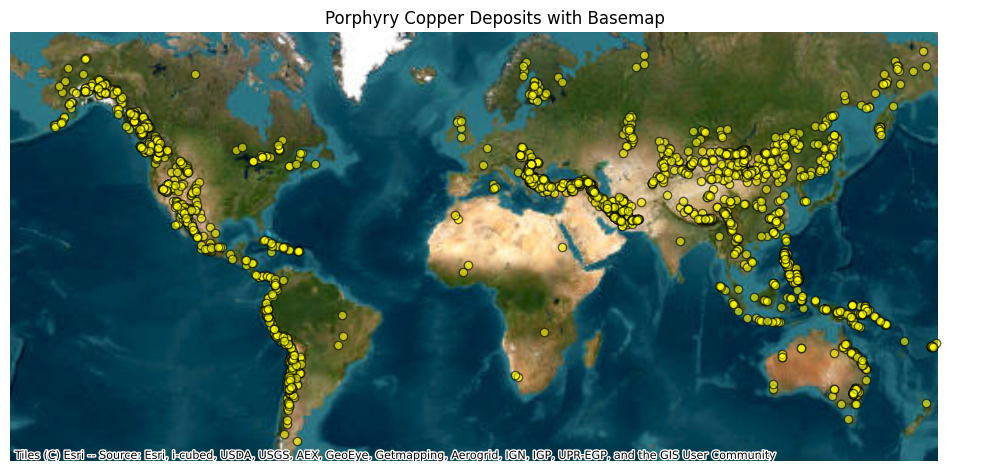

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

df = df.dropna(subset=['LONGITUDE', 'LATITUDE'])  
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')  

gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_web.plot(ax=ax, alpha=0.6, color='yellow', edgecolor='k')

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_title('Porphyry Copper Deposits with Basemap')
ax.set_axis_off()
plt.tight_layout()
plt.show()
